In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
df = pd.read_csv("snpshiller.csv", parse_dates=True,  thousands=',')
df = df.set_index("date", drop = True)
df = df.sort_index()

In [90]:
df.head()

,S&P,Shiller,Log SNP
date,,,
1/1/1872,106.26,11.90,4.665889
1/1/1873,109.22,12.25,4.693364
1/1/1874,104.20,11.33,4.646312
1/1/1875,109.10,11.41,4.692265
1/1/1876,113.69,11.79,4.733475


<AxesSubplot:xlabel='date'>

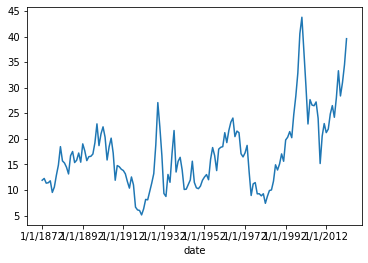

In [91]:
df["Shiller"].plot()

<AxesSubplot:xlabel='date'>

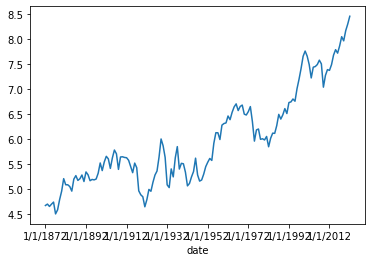

In [94]:
(np.log(df["S&P"])).plot()

In [68]:
def norm_pd(df: pd.DataFrame, exclude = ["date"]):
    df = df.copy()
    cols = [c for c in df.columns if c not in exclude]
    for c in cols:
        df[c] = (df[c] - df[c].mean()) / df[c].std()
    
    return df

In [69]:
normed_df = norm_pd(df)

In [70]:
normed_df.head()

,S&P,Shiller,Log SNP
date,,,
1/1/1872,-0.682436,-0.719749,-1.387618
1/1/1873,-0.678762,-0.671129,-1.358568
1/1/1874,-0.684993,-0.798930,-1.408317
1/1/1875,-0.678911,-0.787816,-1.359730
1/1/1876,-0.673215,-0.735029,-1.316157


<AxesSubplot:xlabel='date'>

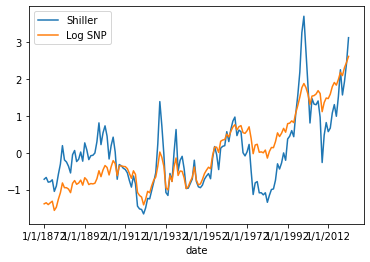

In [71]:
normed_df[["Shiller", "Log SNP"]].plot()

In [112]:
diff = normed_df["Log SNP"].iloc[1:].values - normed_df["Log SNP"].iloc[:-1].values

normed_df["growth"] = 0.0
normed_df["growth"].iloc[1:] = diff

<AxesSubplot:xlabel='date'>

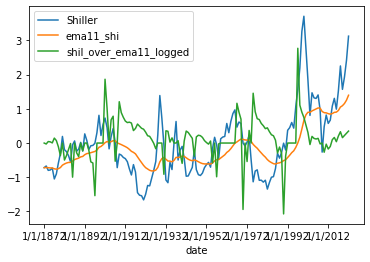

In [85]:
normed_df[["Shiller", "ema11_shi", "shil_over_ema11_logged"]].plot()

<AxesSubplot:xlabel='date'>

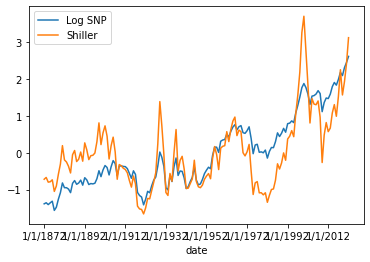

In [87]:
normed_df[["Log SNP", "Shiller"]].plot()